In [3]:
from pya import *
s = Aserver(bs=1024)
Aserver.default = s  # to set as default server
s.boot()

AServer: sr: 44100, blocksize: 1024,
         Stream Active: True, Device: Speakers (Realtek(R) Audio), Index: 4

C:\Users\Forge-15 1650\anaconda3\lib\site-packages\pya\helper\visualization.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolormesh(ticks[0], ticks[1], data,


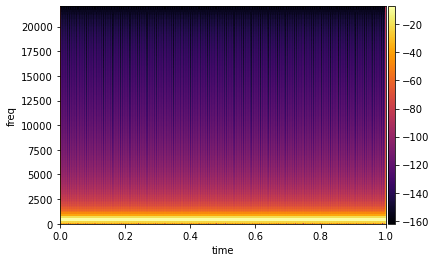

In [4]:
import numpy as np
#creat signal using numpy
signal_array = np.sin(2 * np.pi * 440 * np.linspace(0, 1, 44100))

# sr: sampling rate
# cn : custom defined channel names
# label: custom set identifier string
atone = Asig(signal_array, sr=44100, label='1s sine tone', cn=['left'])
atone.play(server=s)
atone.to_stft().plot(ampdb)
atone.mix_mode = 'extend'

Asig('1s sine tone_arrayindexed_fadein_fadeout_scaled'): 1 x 44100 @ 44100Hz = 1.000s cn=['left']

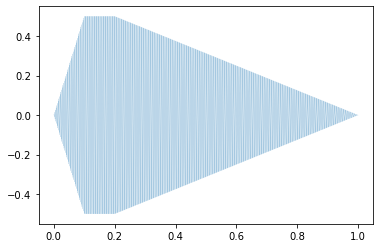

In [5]:
atone[{0:1.5}].fade_in(0.1).fade_out(0.8).gain(db=-6).plot(lw=0.1).play(rate=0.4, onset=1)

In [6]:
# use onset for sequencing
onsets = [0, 1, 1.4, 2., 3.2]
asnap = Asig(onsets, sr=44100, label='1s sine tone', cn=['left'])
for onset in onsets:
    asnap.play(onset=onset)
# asnap.fade_in(0.1, curve=1).fade_out(0.1, curve=1).gain(db=-3).resample(44100/2).plot()

In [7]:
asig = Asig(np.random.rand(5000, 5), cn=['A', 'B', 'C', 'D', 'E'])
asig[:, 0::2]  # equiv to [0, 2, 4]
asig[:, [True, False, True, False, True]]
asig[:, ['C', 'E']]
asig.play(server=s)

Asig(''): 5 x 5000 @ 44100Hz = 0.113s cn=['A', 'B', 'C', 'D', 'E']

In [8]:
from pya import Ugen
sine = Ugen().sine(freq=250, amp=0.6, dur=2.0, sr=44100, channels=2)
square = Ugen().square(freq=250, amp=0.5, dur=2.0, sr=44100, channels=2)
pink = Ugen().noise(type='pink', amp=0.4, dur=2.0, sr=44100, channels=4)

Asig('multichannel'): 4 x 2200 @ 1000Hz = 2.200s cn=['a', 'b', 'c', 'd']

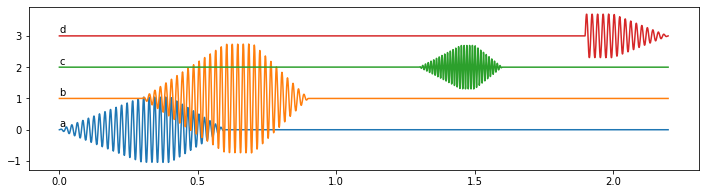

In [9]:
# multichannel audio
import matplotlib.pyplot as plt

a = Asig(1, sr=1000, channels=4, cn=['a', 'b', 'c', 'd'], label='multichannel')
b = Ugen().sine(freq=50, sr=1000, dur=0.6).fade_in(0.3).fade_out(0.2)

#ploting signal
a.x[:, 'a'] = 0.3 * b # no need to extend as len(src)<len(dest)
a.x[300:, 'b'] = 0.5 * b # extends a to 0.9 seconds
a.x[1300:, 'c'] = 0.2 * b[::2] # extends a further, writing beyond end
a.x[1900:, 3] = 0.2 * b[300:] # note that 3 is 'd'
plt.figure(figsize=(12,3)); a.plot(offset=1, scale=3.5)

# ASPEC
# an audio spectrum class, using rfft as real-valued signals are always implied 

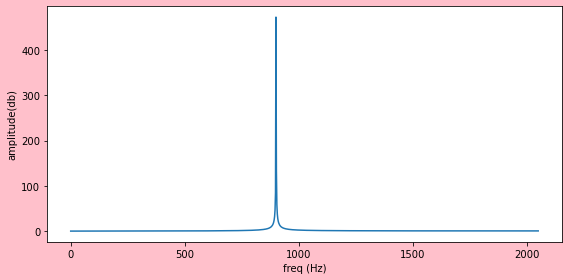

In [10]:
#figsize = (width,height)
plt.figure(figsize=(8,4),facecolor='pink', edgecolor='white')

#Unite generator for common signals, in this case, Ugen.square(freq=250, amp=0.5, dur=2.0, sr=44100, channels=2)
# asig = Ugen().square(freq=250, amp=0.5, dur=2.0, sr=44100, channels=2)
asig = Ugen().sine(freq =900, sr = 4100, dur=0.5, amp = 0.5)
asig.to_spec().plot();
plt.ylabel('amplitude(db)')
plt.tight_layout()

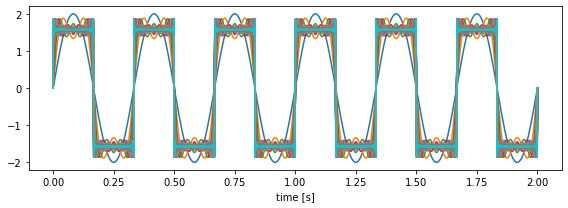

In [11]:
#ploting additive synthesis
plt.figure(figsize=(8,3))

#Asig(duration)
#arrange()
# np.arange(3)
# array([0, 1, 2])
asig = Asig(2.0)
harmonics = (1 + 2 * np.arange(100))

#in is a membership Operator
#zip join 2 tuples together, in this case, 2 types of harmonics
for f, a in zip(3*harmonics, 2/harmonics):
    #create sine wave using class Ugen(); freq by default is 440Hz
    asig += Ugen().sine(f, a, sr=44100, dur=2.)
    asig.label = "Additive Synthesis"
    asig.plot(); plt.xlabel('time [s]'); plt.tight_layout()

In [12]:
# load data: EEG data
data = np.loadtxt("data/epileptic-eeg.csv", delimiter=",",skiprows=1 )
# print(data.shape)
chnls = "SubjectID VideoID Attention Mediation Raw Delta Theta Alpha1 Alpha2 Beta1 Beta2 Gamma1 Gamma2 predefinedlabel user-definedlabeln".split(" ")
aeeg = Asig(data, sr=256.41, cn=chnls)
aeeg

Asig(''): 15 x 12811 @ 256.41Hz = 49.963s cn=['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'predefinedlabel', 'user-definedlabeln']

Asig('_arrayindexed_normalised_resampled'): 2 x 220689 @ 44100Hz = 5.004s cn=['Gamma1', 'Gamma2']

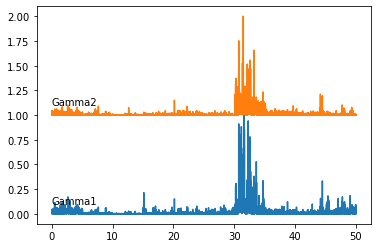

In [13]:
a1 = aeeg[:,[11,12]].norm(1).plot(offset=1).resample(44100, rate=10).play()
a1.save_wavfile('data/Gamma.wav')

Asig('_arrayindexed_normalised_resampled'): 2 x 88275 @ 44100Hz = 2.002s cn=['Gamma1', 'Gamma2']

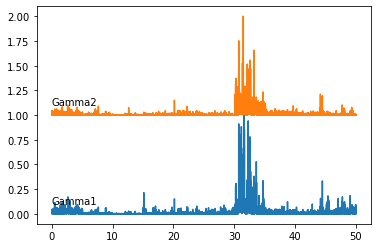

In [14]:
# rate = speedup(25x)
a1 = aeeg[:,[11, 12]].norm(1).plot(offset=1).resample(44100, rate=25).play()
# pitch decrease corresponds to slowing down of epileptic rhythm over seizure
a1.save_wavfile('data/Gamma-rate25.wav')

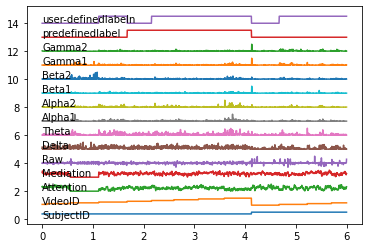

In [15]:
a2 = aeeg[{16:22}].norm().plot(scale=0.5, offset=1).resample(8000, rate=1)

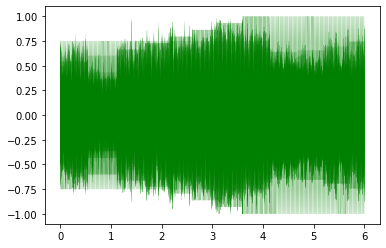

In [16]:
asum = Asig(a2.get_duration(), sr=a2.sr)
for i in range(a2.channels):
    asum += a2[:, i] * Ugen().sine(90*(i+1), dur=a2.get_duration(), sr=a2.sr)
    asum.norm().plot(color="g", lw=0.1).stereo().play(rate=0.5).save_wavfile('data/S3-timbraleeg.wav')
    asum.label='timbral-eeg-son'; asum

# Parameters sonification

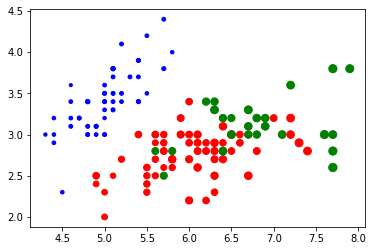

In [17]:
diris = np.loadtxt("data/iris.csv", delimiter=",", skiprows = 1)
plt.scatter(diris[:,1], diris[:,2], c=[['b','r','g'][int(el)]
for el in diris
    [:,4]], s=10*diris[:,3]);

Asig('sine_fadein_enveloped_scaled_to_stereo'): 2 x 2400 @ 8000Hz = 0.300s cn=['l', 'r']

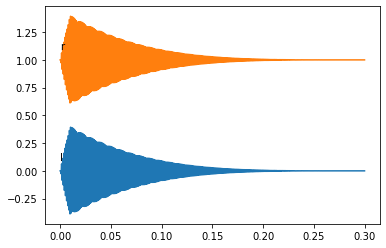

In [18]:
def mysyn(freq=440, dur=0.34, amp=0.9, att=0.01, pan=0.5):
    return Ugen().sine(freq, dur=float(dur), sr=8000).fade_in(0.01)\
.envelope([0,1,0], [0, att, dur], curve=4).gain(amp).stereo([1-pan, pan])
# test synth: plot and play a test tone
mysyn(freq=900, dur=0.3, att=0.001).plot(offset=1).play()

In [19]:
dmin = np.min(diris, axis=0)
dmax = np.max(diris, axis=0)
def mapcol(vect, k, rmin, rmax):
    return linlin(vect[k], dmin[k], dmax[k], rmin, rmax)

Asig('_normalised'): 2 x 16799 @ 8000Hz = 2.100s cn=['0', '1']

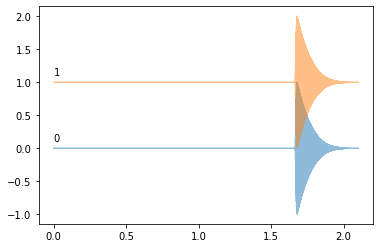

In [20]:
son = Asig(1.0, sr=8000, channels=2)
for i, v in enumerate(diris):
    onset = mapcol(v, 2, 0,4)
    dur = mapcol(v, 4, 1, 0.2)
    freq = mapcol(v, 1, 200, 2000)
    amp = mapcol(v, 0, 0, 1)
    pan = mapcol(v, 3, 0, 1)
son.x[{onset:None}] += mysyn(freq, dur, amp, 0.001, pan)
son = son.norm().plot(offset=1, alpha=0.5).play()
son.save_wavfile('data/S4-PMson-iris-dataset.wav')

C:\Users\Forge-15 1650\anaconda3\lib\site-packages\pya\helper\helpers.py:55: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(amp)
C:\Users\Forge-15 1650\anaconda3\lib\site-packages\pya\helper\visualization.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolormesh(ticks[0], ticks[1], data,


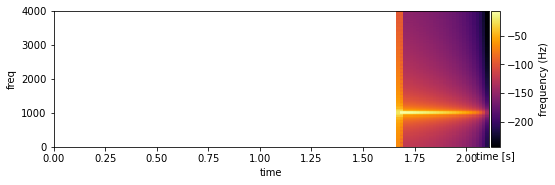

In [21]:
# create Figure for paper
plt.figure(figsize=(8,2.5))
son[:,1].to_stft().plot(ampdb)
plt.xlabel('time [s]'); plt.ylabel('frequency (Hz)');

# Some tutorial on working with csv files

In [22]:
# skiprows = skipping the header
data = np.loadtxt("data/weight_height.csv", delimiter = ",", skiprows=1, max_rows = 30)
print(data.shape)#(100 columns, 2 rows)
print(data[:3])

(30, 2)
[[110.9  146.03]
 [ 44.83 211.82]
 [ 97.13 209.3 ]]


In [23]:
with open("data/weight_height_5.txt") as f:

    #determining number of columns from the first line of text
    n_cols = len(f.readline().split(","))

data = np.loadtxt("data/weight_height_5.txt", delimiter=",",usecols=np.arange(1, n_cols)) #arrage(ignore[0],total number of columns
print("First five rows:\n",data[:10])

First five rows:
 [[110.9  146.03]
 [ 44.83 211.82]
 [ 97.13 209.3 ]
 [ 69.87 207.73]
 [ 48.73 158.87]
 [ 99.25 195.41]
 [ 50.15 184.07]
 [ 64.86 220.5 ]
 [108.96 192.7 ]
 [ 88.13 220.3 ]]


In [24]:
# create generator function
def generate_specific_rows(filePath, row_indices=[]):

    # f is a representation for your csv file
    with open("data/weight_height_2.txt") as f:

        # using enumerate to track line no.
        # I assume i as a counter obj in your for loop
        for i, line in enumerate(f):
    
            #if line no. is in the row index list, then return that line
            if i in row_indices:
 
               yield line
    print(i)
    
gen = generate_specific_rows("./weight_height_2.txt",row_indices = [1, 3, 99])

data = np.loadtxt(gen, delimiter=",")

print(data)

99
[[ 44.83 211.82]
 [ 69.87 207.73]
 [105.64 164.21]]


In [27]:
with open("data/weight_height_2.txt") as f:

    n = len(list(f))
print("n =", n)

data = np.loadtxt("data/weight_height_2.txt", delimiter=",",max_rows= n - 1)
print("data shape =",data.shape)

n = 100
data shape = (99, 2)


In [30]:
def loadtext_without_columns(filePath, skipcols=[], delimiter=","):

    with open(filePath) as f:
 
       n_cols = len(f.readline().split(delimiter))

    #define a range from 0 to n_cols
    usecols = np.arange(0, n_cols)

    #remove the indices found in skipcols
    usecols = set(usecols) - set(skipcols)

    #sort the new indices in ascending order
    usecols = sorted(usecols)

    #load the file and retain indices found in usecols
    data = np.loadtxt(filePath, delimiter = delimiter, usecols = usecols)

    return data

data = loadtext_without_columns("data/weight_height_6.txt",skipcols = [0,1,2], delimiter = ",")

# print first 5 rows
print(data[:5])

[[   7. 1981.]
 [   2. 1986.]
 [   2. 1989.]
 [  10. 1984.]
 [   3. 1999.]]


In [31]:
data = np.loadtxt("data/weight_height_7.txt",delimiter=",")

print("Current shape = ",data.shape)

data = data.reshape(3,30,2)

print("Modified shape = ",data.shape)

print("fifth individual of section B - weight, height =",data[1,4,:])

Current shape =  (90, 2)
Modified shape =  (3, 30, 2)
fifth individual of section B - weight, height = [ 59.85 155.53]


In [32]:
# handling missing data
# finding number of columns in the file
with open("data/weight_height_8.txt") as f:

    n_cols = len(f.readline().split(","))

print("Number of columns", n_cols)

# defining converters for each of the column (using 'dictionary
# comprehension') to fill each missing value with fill_value

fill_value = 0

converters = {i: lambda s: float(s.strip() or fill_value) for i in range(2)}

data = np.loadtxt("data/weight_height_8.txt", delimiter=",",converters = converters)

print("data shape =",data.shape)

print("First 5 rows:\n",data[:5])

Number of columns 2
data shape = (100, 2)
First 5 rows:
 [[  0.   146.03]
 [ 44.83 211.82]
 [ 97.13   0.  ]
 [ 69.87 207.73]
 [  0.   158.87]]
